# Validating generated output data

In [2]:
import tempfile

# creates temporary directory which will be cleaned once the notebook is closed
EXPORT_PATH_OBJ = tempfile.TemporaryDirectory()
EXPORT_PATH = EXPORT_PATH_OBJ.name

In [3]:
from focus_converter.converter import FocusConverter
from focus_converter.data_loaders.data_loader import DataFormats, ParquetDataFormat

# load sample data to be converted using the focus_converter library
parquet_dataset_path = "~/focus_test_dataset/" # This can also be an object store path in the format <s3, gs>://<sample_bucket>/<sample_file>

converter = FocusConverter(
    column_prefix="gcp_" # Optional column prefix if needed else can be set to None
)
converter.load_provider_conversion_configs()
converter.load_data(
    data_path=parquet_dataset_path,
    data_format=DataFormats.PARQUET,
    parquet_data_format=ParquetDataFormat.DATASET,
)
converter.configure_data_export(
    export_path=EXPORT_PATH,
    export_include_source_columns=False,
)
converter.prepare_horizontal_conversion_plan(provider="gcp")
converter.convert()


100%|██████████| 403805/403805 [00:00<00:00, 880967.38it/s]


In [4]:
# Visualizing data

import polars as pl
import pyarrow.dataset as ds

# Load generated dataset as pyarrow dataset for batched read, to prevent out of memory situations
dataset = ds.dataset(EXPORT_PATH)

lf = pl.scan_pyarrow_dataset(dataset) # Creates a lazy data handle

# Lets collect 100 rows to not put extra load on the memory and to visualize
lf.limit(100).collect()

BillingAccountId,ChargePeriodStart,BillingPeriodStart,Publisher,Region,ServiceCategory,ChargePeriodEnd,ChargeType,BilledCost,BillingPeriodEnd
str,"datetime[ms, UTC]","datetime[ms, UTC]",str,str,str,"datetime[ms, UTC]",str,f64,"datetime[ms, UTC]"
"""sample-account…",2023-05-01 00:00:00 UTC,2023-04-01 07:00:00 UTC,"""Google Cloud""","""us-central1""","""Databases""",2023-05-01 01:00:00 UTC,"""Purchase""",0.0,2023-04-01 07:00:00 UTC
"""sample-account…",2023-05-01 04:00:00 UTC,2023-04-01 07:00:00 UTC,"""Google Cloud""","""us-central1""","""Databases""",2023-05-01 05:00:00 UTC,"""Purchase""",0.0,2023-04-01 07:00:00 UTC
"""sample-account…",2023-05-01 06:00:00 UTC,2023-04-01 07:00:00 UTC,"""Google Cloud""","""us-central1""","""Databases""",2023-05-01 07:00:00 UTC,"""Purchase""",0.0,2023-04-01 07:00:00 UTC
"""sample-account…",2023-05-01 10:00:00 UTC,2023-05-01 07:00:00 UTC,"""Google Cloud""","""us-central1""","""Databases""",2023-05-01 11:00:00 UTC,"""Purchase""",0.0,2023-05-01 07:00:00 UTC
"""sample-account…",2023-05-01 01:00:00 UTC,2023-04-01 07:00:00 UTC,"""Google Cloud""","""us-central1""","""Databases""",2023-05-01 02:00:00 UTC,"""Purchase""",0.0,2023-04-01 07:00:00 UTC
"""sample-account…",2023-05-01 05:00:00 UTC,2023-04-01 07:00:00 UTC,"""Google Cloud""","""us-central1""","""Databases""",2023-05-01 06:00:00 UTC,"""Purchase""",0.0,2023-04-01 07:00:00 UTC
"""sample-account…",2023-05-01 07:00:00 UTC,2023-05-01 07:00:00 UTC,"""Google Cloud""","""us-central1""","""Databases""",2023-05-01 08:00:00 UTC,"""Purchase""",0.0,2023-05-01 07:00:00 UTC
"""sample-account…",2023-05-01 11:00:00 UTC,2023-05-01 07:00:00 UTC,"""Google Cloud""","""us-central1""","""Databases""",2023-05-01 12:00:00 UTC,"""Purchase""",0.0,2023-05-01 07:00:00 UTC
"""sample-account…",2023-05-01 12:00:00 UTC,2023-05-01 07:00:00 UTC,"""Google Cloud""","""us-central1""","""Databases""",2023-05-01 13:00:00 UTC,"""Purchase""",0.0,2023-05-01 07:00:00 UTC


In [6]:
from focus_validator.validator import Validator
import tempfile

with tempfile.NamedTemporaryFile() as temp_file:
    # collect a sample of 100 rows to validate, selecting larger number will proportionally slow the process and require more memory
    df = lf.limit(100).collect()

    # writes comverted data to a csv which will be read by validator
    df.write_csv(temp_file.name)

    # creates validator instance with console output
    validator = Validator(
        data_filename=temp_file.name,
        output_type="console",
        output_destination=None,
    )
    validator.load()    
    results = validator.spec_rules.validate(validator.focus_data)
    results.process_result()
    validator.validate()


Checklist:
+----+--------------+----------------+--------------------+----------------------------------------------------+---------+----------+
|    | Check Name   | Check Type     | Column             | Friendly Name                                      | Error   | Status   |
|----+--------------+----------------+--------------------+----------------------------------------------------+---------+----------|
|  0 | FV-D005-0001 | dict           | BillingAccountName | Ensures that column is of string type.             |         | Passed   |
|  1 | FV-D007-0001 | dict           | Publisher          | Ensures that column is of string type.             |         | Passed   |
|  2 | FV-D013-0001 | dict           | Region             | Ensures that column is of string type.             |         | Passed   |
|  3 | FV-D004-0001 | dict           | Provider           | Ensures that column is of string type.             |         | Passed   |
|  4 | FV-D010-0001 | dict           | BilledCurren

In [8]:
import pandas as pd

df = pd.DataFrame([obj.model_dump() for obj in results.checklist.values()])
df


,check_name,column_id,friendly_name,error,status,rule_ref
0,FV-D005-0001,BillingAccountName,Ensures that column is of string type.,None,ChecklistObjectStatus.PASSED,"{'check_id': 'FV-D005-0001', 'column_id': 'Bil..."
1,FV-D007-0001,Publisher,Ensures that column is of string type.,None,ChecklistObjectStatus.PASSED,"{'check_id': 'FV-D007-0001', 'column_id': 'Pub..."
2,FV-D013-0001,Region,Ensures that column is of string type.,None,ChecklistObjectStatus.PASSED,"{'check_id': 'FV-D013-0001', 'column_id': 'Reg..."
3,FV-D004-0001,Provider,Ensures that column is of string type.,None,ChecklistObjectStatus.PASSED,"{'check_id': 'FV-D004-0001', 'column_id': 'Pro..."
4,FV-D010-0001,BilledCurrency,Ensures that column is of currency-code type.,None,ChecklistObjectStatus.PASSED,"{'check_id': 'FV-D010-0001', 'column_id': 'Bil..."
5,FV-D009-0001,ServiceName,Ensures that column is of string type.,None,ChecklistObjectStatus.PASSED,"{'check_id': 'FV-D009-0001', 'column_id': 'Ser..."
6,FV-D011-0001,BillingPeriodEnd,Ensures that column is of datetime type.,None,ChecklistObjectStatus.PASSED,"{'check_id': 'FV-D011-0001', 'column_id': 'Bil..."
7,FV-D001-0001,ChargeType,Ensures that column is of string type.,None,ChecklistObjectStatus.PASSED,"{'check_id': 'FV-D001-0001', 'column_id': 'Cha..."
8,FV-D018-0001,SubAccountName,Ensures that column is of string type.,None,ChecklistObjectStatus.PASSED,"{'check_id': 'FV-D018-0001', 'column_id': 'Sub..."
9,FV-D016-0001,ChargePeriodStart,Ensures that column is of datetime type.,None,ChecklistObjectStatus.PASSED,"{'check_id': 'FV-D016-0001', 'column_id': 'Cha..."


In [10]:
# shows number of dimension rules passed vs failed

counts = df['status'].value_counts()
counts

status
ChecklistObjectStatus.PASSED    52
ChecklistObjectStatus.FAILED     7
Name: count, dtype: int64

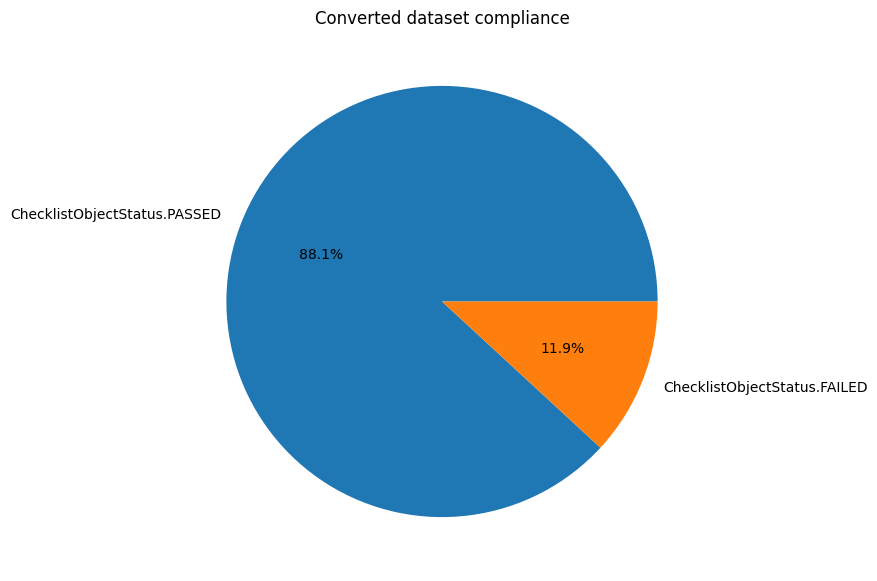

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Converted dataset compliance")
plt.ylabel('')
plt.show()

In [28]:
from focus_validator.config_objects import ChecklistObjectStatus

status_groups = df.groupby('column_id')['status'].apply(list)
dimension_wise_status = status_groups.apply(lambda statuses: all(status == ChecklistObjectStatus.PASSED for status in statuses))
dimension_wise_status

column_id
AmortizedCost         False
AvailabilityZone       True
BilledCost             True
BilledCurrency        False
BillingAccountId       True
BillingAccountName    False
BillingPeriodEnd       True
BillingPeriodStart     True
ChargePeriodEnd        True
ChargePeriodStart      True
ChargeType             True
InvoiceIssuer          True
Provider              False
Publisher              True
Region                 True
ResourceID             True
ResourceName          False
ServiceCategory        True
ServiceName           False
SubAccountName        False
Name: status, dtype: bool

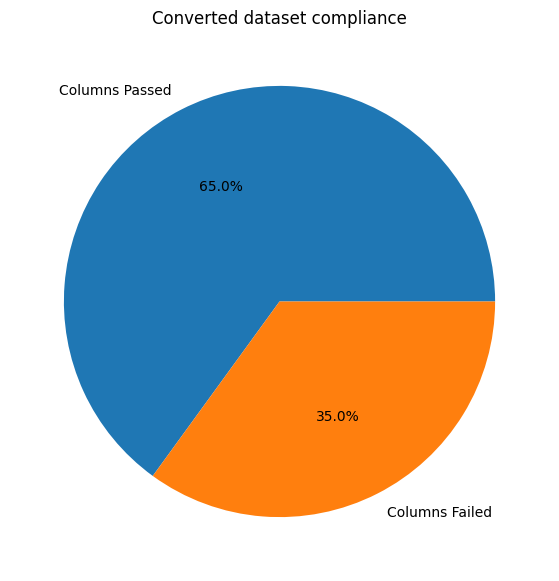

In [30]:
custom_labels = {True: 'Columns Passed', False: 'Columns Failed'}

counts = dimension_wise_status.value_counts()
counts.index = counts.index.map(custom_labels)

plt.figure(figsize=(10, 7))
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Converted dataset compliance")
plt.ylabel('')
plt.show()